# Лабораторная работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студенты гр. 2384 Исмаилов Максим Владимирович и Дамакин Роман Павлович. Вариант №15.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

### 1. Формирование дискретного сигнала

Дискретная последовательность **$x[n]$** (содержащая $N=32$ отсчета, $n=0, \dots, 31$) формируется путем дискретизации непрерывного сигнала, представляющего собой линейную комбинацию гармоник:

$$
x[n] = x(t=n) = \sum_{k=0}^{10} A_k \cos(\omega_k n + \varphi_k)
$$

### 2. Дискретное преобразование Фурье

Для анализа частотного состава сигнала используется **Дискретное преобразование Фурье (ДПФ)**, которое позволяет получить коэффициенты спектра $X[k]$:

$$X[k] = \sum_{n=0}^{N-1} x[n] e^{-i \frac{2\pi}{N} kn}$$

### 3. Нерекурсивные фильтры и передаточная функция

В работе применяются **нерекурсивные фильтры (FIR)** с симметричными коэффициентами $h_k$. Их поведение в частотной области описывается **Передаточной функцией $H(\omega)$**:

$$H(\omega) = h_0 + 2\sum_{k=1}^{m} h_k \cos(k\omega)$$

### 4. Коэффициенты сглаживающих фильтров

**Импульсная характеристика** $h$ (набор коэффициентов) зависит от выбранного метода аппроксимации:

| Метод сглаживания | Длина окна ($2m+1$) | Коэффициенты ($h$) |
| :--- | :--- | :--- |
| **Линейное (Полином 1-й ст.)** | Любая | $h_k = \frac{1}{2m+1}$ |
| **Полином 2-й ст.** | 5 точек ($m=2$) | $h = \frac{1}{35}[-3, 12, 17, 12, -3]$ |
| | 9 точек ($m=4$) | $h = \frac{1}{231}[-21, 14, 39, 54, 59, 54, 39, 14, -21]$ |
| **Полином 4-й ст.** | 7 точек ($m=3$) | $h = \frac{1}{231}[5, -30, 75, 131, 75, -30, 5]$ |
| | 11 точек ($m=5$) | $h = \frac{1}{429}[18, -45, -10, 60, 120, 143, 120, 60, -10, -45, 18]$ |

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

## Порядок выполнения работы

1. Сформировать дискретный сигнал посредством дискретизации с шагом $T = 1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k \cos(\omega_k t + \varphi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\Delta\omega = 0.1\pi$ Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\varphi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета ($N = 31$).

2. Визуализировать исходные аналоговый и дискретизированный сигналы.

3. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

4. Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

5. Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

6. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

7. Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.

8. Повторить п. 4–7 для следующих фильтров:
- Сглаживание полиномом 2-ой степени по 5 и 9 узлам.
- Сглаживание полиномом 4-ой степени по 7 и 11 узлам.

9. Содержательно проинтерпретировать результаты выполнения практической работы, сделать выводы.

## Выполнение работы

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math as m

### 1.

In [3]:
T = 1
n = 11
dw = 0.1 * m.pi
N = 32

A_raw = np.arange(1, 12)
A_perm = np.random.permutation(A_raw)
A_norm = A_perm / np.sum(A_perm)

w = np.arange(n) * dw
phi = np.random.rand(n) * 0.5

def s(t):
    t = np.asarray(t)
    if t.ndim == 0:
        return np.sum(A_norm * np.cos(w * t + phi))
    return np.sum(A_norm[:, None] * np.cos(w[:, None] * t + phi[:, None]), axis=0)

# Аналоговый сигнал
t_analog = np.linspace(0, N - 1, 1000)
S_analog = s(t_analog)

# Дискретный сигнал
t_discrete = np.arange(N) * T
S_discrete = s(t_discrete)


### 2.

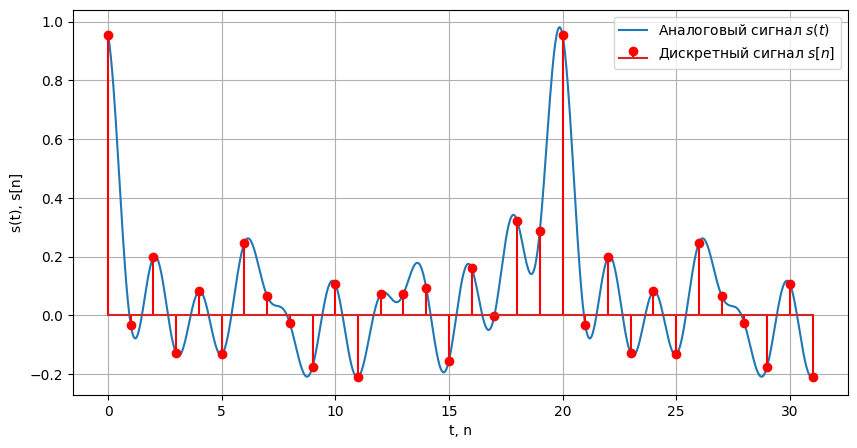

In [17]:
plt.figure(figsize=(10, 5))
# Аналоговый сигнал
plt.plot(t_analog, S_analog, label='Аналоговый сигнал $s(t)$',)
# Дискретный сигнал
plt.stem(t_discrete, S_discrete, linefmt='r', label='Дискретный сигнал $s[n]$')
plt.xlabel('t, n')
plt.ylabel('s(t), s[n]')
plt.grid(True)
plt.legend()
plt.show()

### 3.

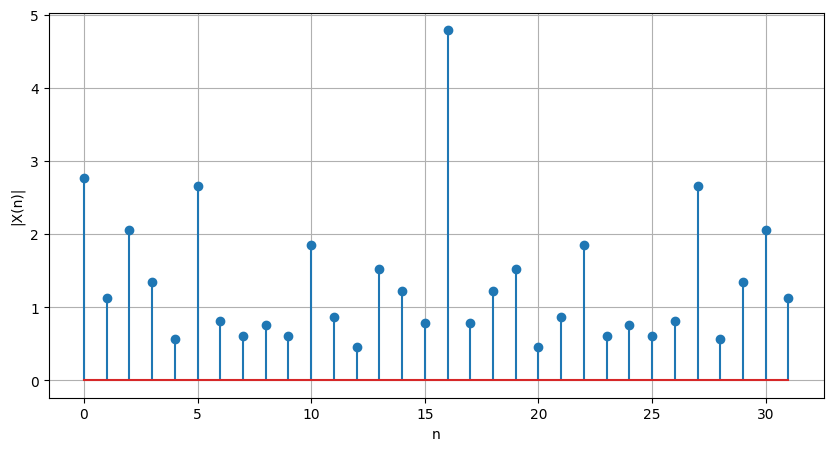

In [20]:
X_vals = np.fft.fft(S_discrete)


plt.figure(figsize=(10, 5))
plt.stem(np.arange(len(X_vals)), np.abs(X_vals))
plt.xlabel('n')
plt.ylabel('|X(n)|')
plt.grid(True)
plt.show()

### 4.

Линейное сглаживание по $2m+1$ точкам – это фильтр с одинаковыми коэффициентами $h_k = 1/(2m+1)$.
Для симметричного фильтра частотная характеристика $H(w)$ вычисляется по формуле:
$$H(w) = h_0 + 2*\sum_{k=1}^{m} h_k*cos(k*w)$$


Для 5-ти точек (m=2):
$$H_5(w) = \frac{1}{5} (1 + 2cos(w) + 2cos(2w))$$


Для 9-ти точек (m=4):
$$H_9(w) = \frac{1}{9} (1 + 2cos(w) + 2cos(2w) + 2cos(3w) + 2cos(4w))$$

In [21]:
# Сглаживание по 5 точкам
S_smooth5 = np.convolve(S_discrete, np.ones(5)/5, mode='same')


# Сглаживание по 9 точкам)
S_smooth9 = np.convolve(S_discrete, np.ones(9)/9, mode='same')

### 5.

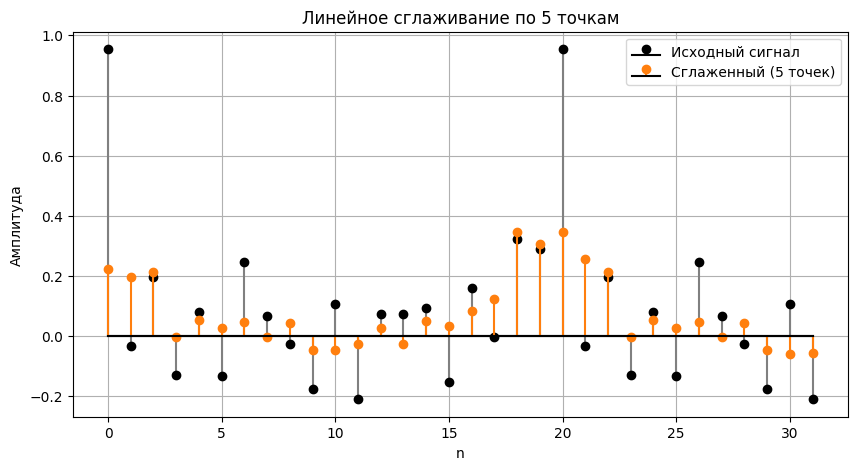

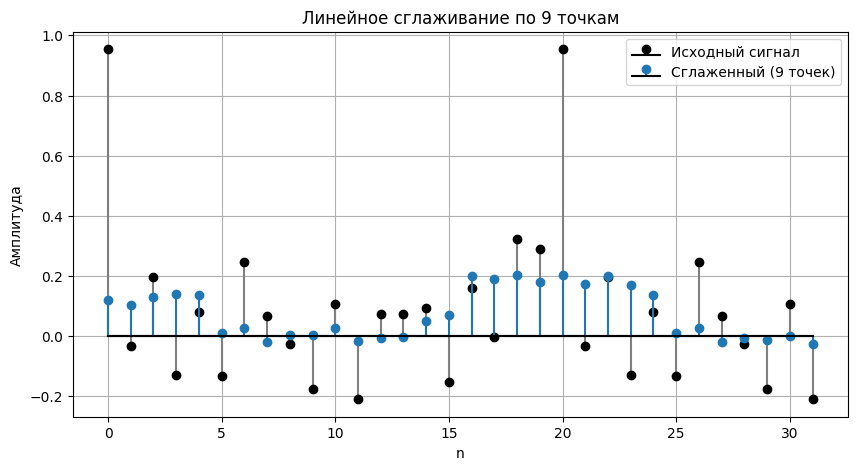

In [26]:
plt.figure(figsize=(10,5))
plt.stem(t_discrete, S_discrete, linefmt='grey', markerfmt='ko', basefmt='k-', label='Исходный сигнал')
plt.stem(t_discrete, S_smooth5, linefmt='C1-', markerfmt='C1o', basefmt='k-', label='Сглаженный (5 точек)')
plt.xlabel('n')
plt.ylabel('Амплитуда')
plt.title('Линейное сглаживание по 5 точкам')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10,5))
plt.stem(t_discrete, S_discrete, linefmt='grey', markerfmt='ko', basefmt='k-', label='Исходный сигнал')
plt.stem(t_discrete, S_smooth9, linefmt='C0-', markerfmt='C0o', basefmt='k-', label='Сглаженный (9 точек)')
plt.xlabel('n')
plt.ylabel('Амплитуда')
plt.title('Линейное сглаживание по 9 точкам')
plt.legend()
plt.grid(True)
plt.show()

### 6.

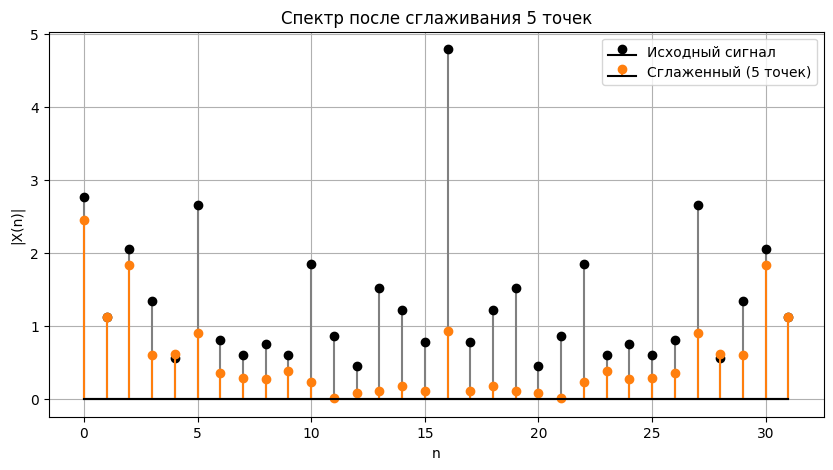

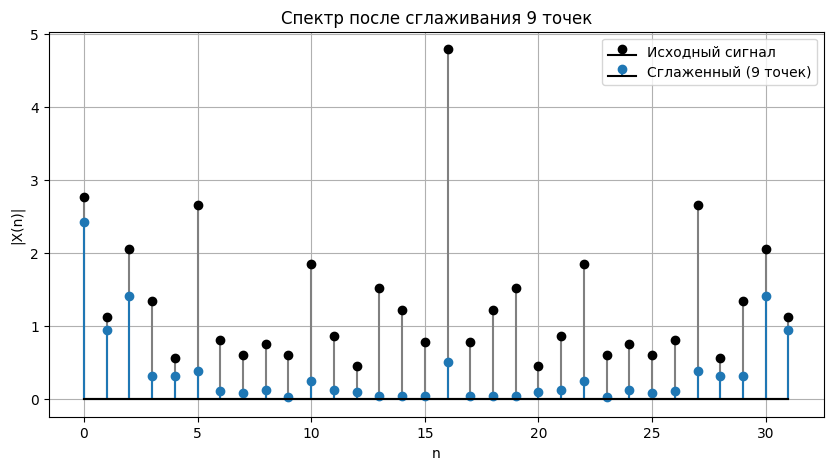

In [29]:
X_smooth5 = np.fft.fft(S_smooth5)
X_smooth9 = np.fft.fft(S_smooth9)


plt.figure(figsize=(10,5))
plt.stem(np.arange(N), np.abs(X_vals), linefmt='grey', markerfmt='ko', basefmt='k-', label='Исходный сигнал')
plt.stem(np.arange(N), np.abs(X_smooth5), linefmt='C1-', markerfmt='C1o', basefmt='k-', label='Сглаженный (5 точек)')
plt.xlabel('n')
plt.ylabel('|X(n)|')
plt.title('Спектр после сглаживания 5 точек')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10,5))
plt.stem(np.arange(N), np.abs(X_vals), linefmt='grey', markerfmt='ko', basefmt='k-', label='Исходный сигнал')
plt.stem(np.arange(N), np.abs(X_smooth9), linefmt='C0-', markerfmt='C0o', basefmt='k-', label='Сглаженный (9 точек)')
plt.xlabel('n')
plt.ylabel('|X(n)|')
plt.title('Спектр после сглаживания 9 точек')
plt.legend()
plt.grid(True)
plt.show()

### 7.
**Анализ спектра после фильтрации**

После применения линейного сглаживания спектр дискретного сигнала изменился в соответствии с передаточной функцией $H(\omega)$. Высокочастотные гармоники были подавлены, а низкочастотные сохранились.

При сглаживании по 5 точкам высокие частоты ослаблены умеренно, и форма сигнала в целом остается близкой к исходной.

При сглаживании по 9 точкам подавление высокочастотных компонентов значительно сильнее, сигнал становится более сглаженным и менее похожим на исходный.

Таким образом, линейное сглаживание действует как фильтр нижних частот, и увеличение числа точек усреднения усиливает фильтрацию, что соответствует расчетной частотной характеристике $H(\omega)$.


### 8.

### 8.a. Сглаживание полиномом 2-й степени

**1. Фильтр по 5 точкам**

Уравнение свертки для сглаживания:
$$y_n = \frac{1}{35} \left( -3s_{n-2} + 12s_{n-1} + 17s_{n} + 12s_{n+1} - 3s_{n+2} \right)$$

Частотная характеристика фильтра:
$$H(\omega) = \frac{1}{35} \left( 17 + 24\cos(\omega) - 6\cos(2\omega) \right)$$

**2. Фильтр по 9 точкам**

Уравнение свертки для сглаживания:
$$y_n = \frac{1}{231} \left( -21s_{n-4} + 14s_{n-3} + 39s_{n-2} + 54s_{n-1} + 59s_{n} + 54s_{n+1} + 39s_{n+2} + 14s_{n+3} - 21s_{n+4} \right)$$

Частотная характеристика фильтра:
$$H(\omega) = \frac{1}{231} \left( 59 + 108\cos(\omega) + 78\cos(2\omega) + 28\cos(3\omega) - 42\cos(4\omega) \right)$$

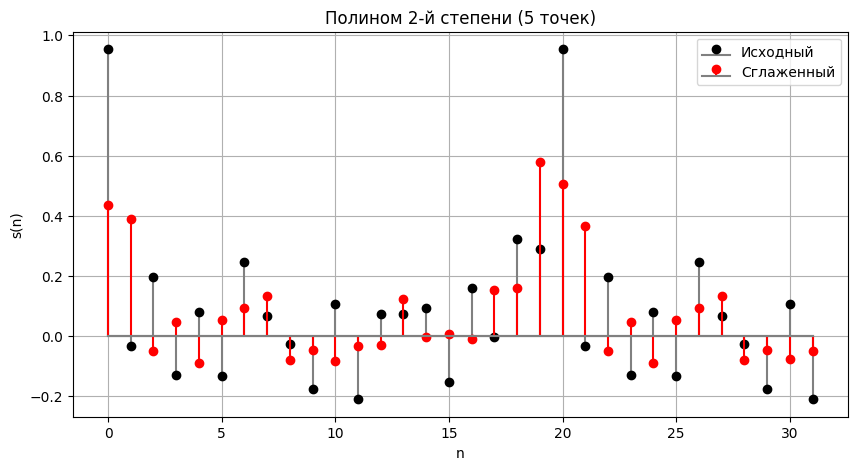

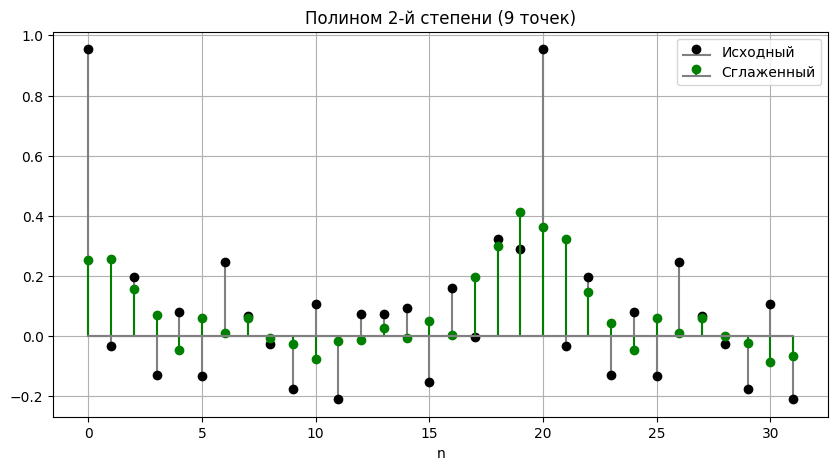

In [38]:
h_p2_5 = np.array([-3, 12, 17, 12, -3]) / 35
h_p2_9 = np.array([-21, 14, 39, 54, 59, 54, 39, 14, -21]) / 231

S_poly2_5 = np.convolve(S_discrete, h_p2_5, mode='same')
S_poly2_9 = np.convolve(S_discrete, h_p2_9, mode='same')

# График для 5 точек
plt.figure(figsize=(10,5))
plt.title('Полином 2-й степени (5 точек)')
plt.stem(t_discrete, S_discrete, linefmt='gray', markerfmt='ko', basefmt='gray', label='Исходный')
plt.stem(t_discrete, S_poly2_5, linefmt='r-', markerfmt='ro', basefmt='gray', label='Сглаженный')
plt.xlabel('n')
plt.ylabel('s(n)')
plt.legend()
plt.grid(True)
plt.show()

# График для 9 точек
plt.figure(figsize=(10,5))
plt.title('Полином 2-й степени (9 точек)')
plt.stem(t_discrete, S_discrete, linefmt='gray', markerfmt='ko', basefmt='gray', label='Исходный')
plt.stem(t_discrete, S_poly2_9, linefmt='g-', markerfmt='go', basefmt='gray', label='Сглаженный')
plt.xlabel('n')
plt.legend()
plt.grid(True)
plt.show()

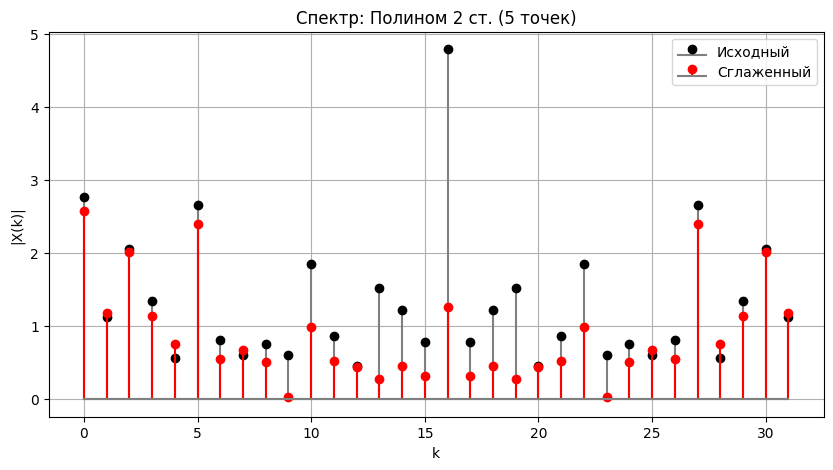

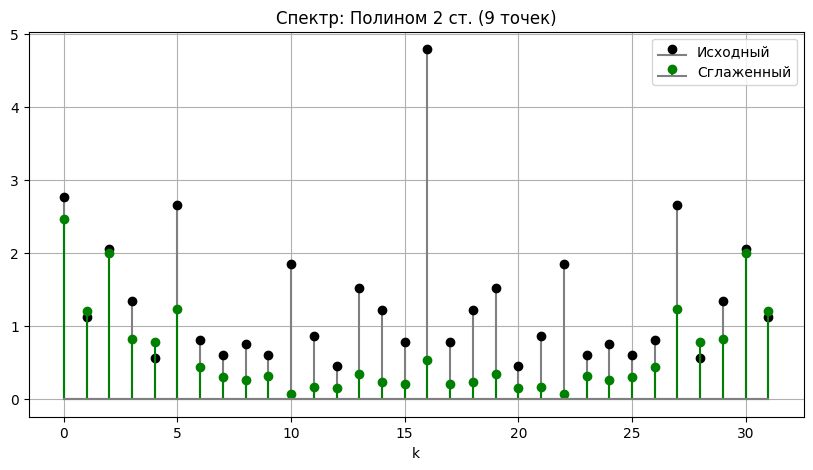

In [36]:
X_orig = np.fft.fft(S_discrete)
X_poly2_5 = np.fft.fft(S_poly2_5)
X_poly2_9 = np.fft.fft(S_poly2_9)

plt.figure(figsize=(10,5))
plt.title('Спектр: Полином 2 ст. (5 точек)')
plt.stem(t_discrete, np.abs(X_orig), linefmt='gray', markerfmt='ko', basefmt='gray', label='Исходный')
plt.stem(t_discrete, np.abs(X_poly2_5), linefmt='r-', markerfmt='ro', basefmt='gray', label='Сглаженный')
plt.xlabel('k')
plt.ylabel('|X(k)|')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.title('Спектр: Полином 2 ст. (9 точек)')
plt.stem(t_discrete, np.abs(X_orig), linefmt='gray', markerfmt='ko', basefmt='gray', label='Исходный')
plt.stem(t_discrete, np.abs(X_poly2_9), linefmt='g-', markerfmt='go', basefmt='gray', label='Сглаженный')
plt.xlabel('k')
plt.legend()
plt.grid(True)
plt.show()

**Анализ результатов (Полином 2-й степени):**

При использовании аппроксимации полиномом 2-й степени наблюдается следующее:
1.  По сравнению с линейным сглаживанием (рассмотренным ранее), данные фильтры обладают более широкой полосой пропускания. Это видно по спектральным отсчетам: низкочастотные гармоники ослабляются меньше, сохраняя форму сигнала лучше.
2.  Увеличение окна сглаживания с 5 до 9 точек приводит к сужению полосы пропускания фильтра. На графиках видно, что вариант с 9 точками сильнее подавляет высокочастотные компоненты (хвост спектра), однако при этом могут сильнее искажаться полезные гармоники в средней части спектра.

### 8.b. Сглаживание полиномом 4-й степени

**1. Фильтр по 7 точкам**

Уравнение свертки:
$$y_n = \frac{1}{231} \left( 5s_{n-3} - 30s_{n-2} + 75s_{n-1} + 131s_{n} + 75s_{n+1} - 30s_{n+2} + 5s_{n+3} \right)$$

Частотная характеристика:
$$H(\omega) = \frac{1}{231} \left( 131 + 150\cos(\omega) - 60\cos(2\omega) + 10\cos(3\omega) \right)$$

**2. Фильтр по 11 точкам**

Уравнение свертки:
$$y_n = \frac{1}{429} \left( 18s_{n-5} - 45s_{n-4} - 10s_{n-3} + 60s_{n-2} + 120s_{n-1} + 143s_{n} + 120s_{n+1} + 60s_{n+2} - 10s_{n+3} - 45s_{n+4} + 18s_{n+5} \right)$$

Частотная характеристика:
$$H(\omega) = \frac{1}{429} \left( 143 + 240\cos(\omega) + 120\cos(2\omega) - 20\cos(3\omega) - 90\cos(4\omega) + 36\cos(5\omega) \right)$$

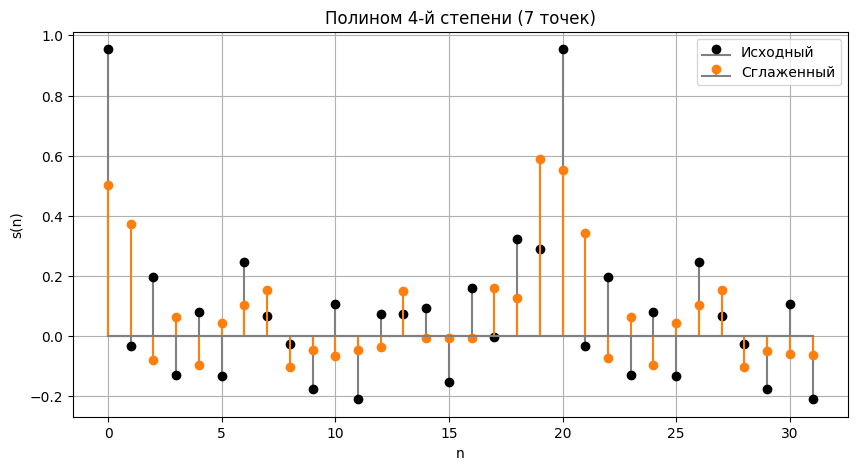

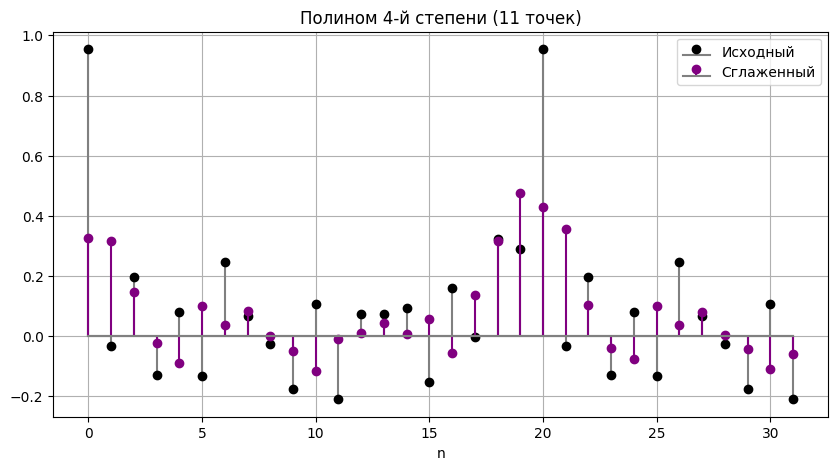

In [39]:
h_p4_7 = np.array([5, -30, 75, 131, 75, -30, 5]) / 231
h_p4_11 = np.array([18, -45, -10, 60, 120, 143, 120, 60, -10, -45, 18]) / 429

S_poly4_7 = np.convolve(S_discrete, h_p4_7, mode='same')
S_poly4_11 = np.convolve(S_discrete, h_p4_11, mode='same')

# График для 7 точек
plt.figure(figsize=(10,5))
plt.title('Полином 4-й степени (7 точек)')
plt.stem(t_discrete, S_discrete, linefmt='gray', markerfmt='ko', basefmt='gray', label='Исходный')
plt.stem(t_discrete, S_poly4_7, linefmt='C1-', markerfmt='C1o', basefmt='gray', label='Сглаженный')
plt.xlabel('n')
plt.ylabel('s(n)')
plt.legend()
plt.grid(True)
plt.show()

# График для 11 точек
plt.figure(figsize=(10,5))
plt.title('Полином 4-й степени (11 точек)')
plt.stem(t_discrete, S_discrete, linefmt='gray', markerfmt='ko', basefmt='gray', label='Исходный')
plt.stem(t_discrete, S_poly4_11, linefmt='purple', markerfmt='o', basefmt='gray', label='Сглаженный')
plt.xlabel('n')
plt.legend()
plt.grid(True)
plt.show()

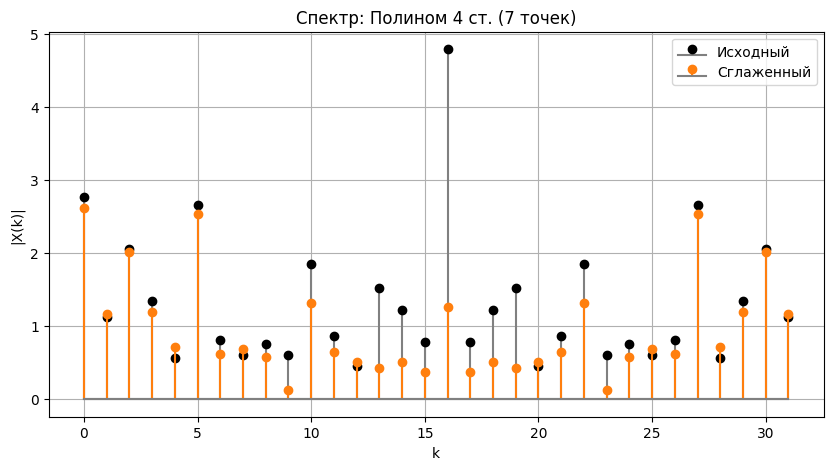

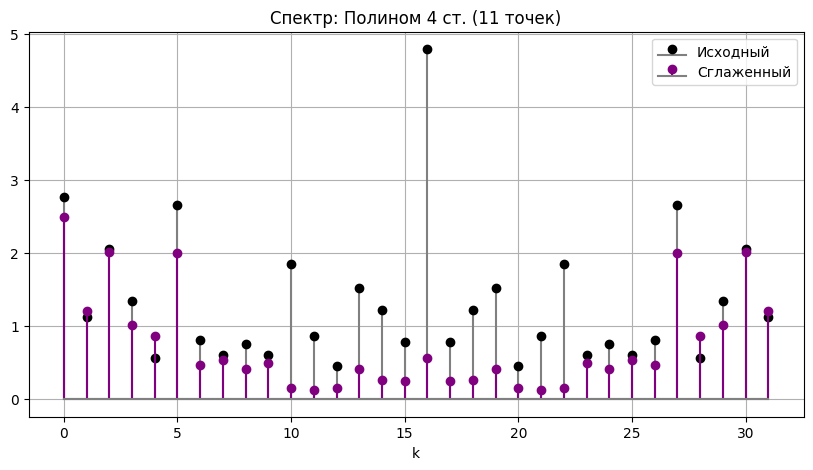

In [40]:
X_poly4_7 = np.fft.fft(S_poly4_7)
X_poly4_11 = np.fft.fft(S_poly4_11)

plt.figure(figsize=(10,5))
plt.title('Спектр: Полином 4 ст. (7 точек)')
plt.stem(t_discrete, np.abs(X_orig), linefmt='gray', markerfmt='ko', basefmt='gray', label='Исходный')
plt.stem(t_discrete, np.abs(X_poly4_7), linefmt='C1-', markerfmt='C1o', basefmt='gray', label='Сглаженный')
plt.xlabel('k')
plt.ylabel('|X(k)|')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.title('Спектр: Полином 4 ст. (11 точек)')
plt.stem(t_discrete, np.abs(X_orig), linefmt='gray', markerfmt='ko', basefmt='gray', label='Исходный')
plt.stem(t_discrete, np.abs(X_poly4_11), linefmt='purple', markerfmt='o', basefmt='gray', label='Сглаженный')
plt.xlabel('k')
plt.legend()
plt.grid(True)
plt.show()

**Анализ результатов (Полином 4-й степени):**

Использование аппроксимирующего полинома 4-й степени демонстрирует следующие особенности:
1.  Полоса пропускания у фильтров 4-й степени еще шире, чем у фильтров 2-й степени. Это обеспечивает минимальное искажение полезного сигнала в низкочастотной области (амплитуды первых гармоник практически не меняются).
2.  Из графиков видно, что сглаживание по 7 точкам фактически повторяет исходный сигнал на большей части интервала, подавляя шум только на самых высоких частотах.
3.  Фильтр по 11 точкам действует более агрессивно в области подавления (высокие частоты), но сохраняет "прозрачность" для полезного сигнала лучше, чем аналогичный по длине фильтр 2-й степени. Это подтверждается значениями передаточной функции $H(\omega)$, которая имеет более плоскую вершину в области нуля.

## Выводы

В ходе выполнения работы были исследованы характеристики нерекурсивных сглаживающих фильтров на дискретном сигнале, а также проанализировано их влияние на сигнал во временной и частотной областях с помощью дискретного преобразования Фурье (ДПФ).

### Результаты фильтрации

Было подтверждено, что выбор фильтра является компромиссом между подавлением шума и сохранением формы полезного сигнала.

| Тип фильтрации | Степень полинома | Характеристика в частотной области | Влияние на форму сигнала |
| :--- | :--- | :--- | :--- |
| **Линейное усреднение** | 1-я | Самая **узкая полоса пропускания**. | **Сильно искажает** полезный сигнал (сглаживает пики), но эффективно подавляет шум. |
| **Полиномиальное сглаживание** | 2-я | **Умеренно широкая** полоса пропускания. | Обеспечивает хороший баланс: лучше сохраняет форму, чем линейный метод. |
| **Полиномиальное сглаживание** | 4-я | Самая **широкая полоса пропускания**. | **Минимальное искажение** полезного сигнала, подавляет только самые высокие частоты. |

### Ключевые зависимости

На практике были подтверждены теоретические зависимости, определяющие частотную характеристику фильтров:

1.  **Степень полинома ($P$):**
    * Чем выше степень полинома, тем шире полоса пропускания фильтра. Это означает, что фильтр лучше сохраняет форму сигнала, но слабее подавляет высокочастотный шум.

2.  **Длина окна (количество точек $M$):**
    * Увеличение длины окна сужает полосу пропускания и приводит к более сильному подавлению высоких частот.